<!--### 連続型確率変数
連続型確率変数はとりうる値が連続的な確率変数のことをいう. 「身長」のように168.419819615…cmと小数点以下の値をどこまでも細かくできるのが連続型確率変数である.
# グラフの線の種類
linestyles = ['-', '--', ':']
-->
<!--
-->

### 1次元の離散型確率変数とは

### 離散型確率変数
離散型確率変数はとりうる値が離散的な確率変数のことをいう.「サイコロの目」のように1,2,3…ととびとびの値をとるのが離散型確率変数である.

### 確率質量関数
離散型確率変数の場合は、確率変数Xの取りうる値の集合を｛$x_{1}$,$x_{2}$,$x_{3}$, …,｝として、確率変数Xが$x_{k}$という値をとる確率を<br> $$　P(X = x_{k}) = p_{k}(k = 1,2,…) $$と定義できる. このとき確率はとりうる値$x_{i}$を因数にとる関数とみることもできるため、<br> $$　f(x) = P(X = x_{i}) $$となる関数$f(x)$と考える事ができ、それを確率質量関数、あるいは単純に確率関数と呼ぶ. とりうる値とその確率の具体的な対応が確率分布と呼ばれるもので、確率変数の確率分布が決まることで、その確率変数の振る舞いが定まることになる. 

***

### ベルヌーイ分布
ベルヌーイ分布は基本的な離散型確率分布であり、取りうる値が0と1しかない確率分布である. ベルヌーイ分布に従う確率変数の試行の事をベルヌーイ分布という. 1が出ることを成功、0が出ることを失敗という. この試行では取りうる値が2つしかないため、どちらかの確率が定まればもう一方も自動的に定まる. つまり、ベルヌーイ分布において1が出る確率をpとすると、0が出る確率は1-pである. $x$をベルヌーイ分布に従う確率変数とすると
\begin{equation}
P(x)＝
\begin{cases}
  p^{x}(1-p)^{1-x} & (x \in \{0,1\})\\\
  0 & (otherwise)
\end{cases}
\end{equation}
と表せる. とりうる値が2通りしかないものは全てベルヌーイ分布で考えることができる. ベルヌーイ分布における期待値E(X)と分散V(X)は$　E(X) = p、V(X)=p(1-p) $と表せる.

***

まず、ベルヌーイ分布の例として、コインを投げることを考える. コインの試行は、表と裏の出る確率が等しい普通のコインを投げるものとする. とりうる値は表を1、裏を0とする. また、結果を視覚的に確認するため、いくつかの関数を決め結果を図示する. E(X)は期待値、V(X)は分散の関数である. check_probは確率変数を引数にとり、その確率変数の期待値と分散を返す関数である. plot_probは確率関数と期待値を図示する関数である.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%precision 2

'%.2f'

<!-- 
確率質量関数（probability mass function, PMF
数値をg(x_k)、その値の確率をf(x_k)
g(x_k) * f(x_k)は1が出る確率が0.1のとき、1 * 0.1 みたいなことを行う
ちなみにこの問題ではx_kを変数として使っているが全然x_kである必要性はなく、x_iとかでも動く
g=lambda x: x　これはg()をg(x)とする定義
なぜ分散の時とかにgの関数を使わなければいけないのかは全く分からない、無名関数だからこそ、定数と違ってなくても許されるのかも？

Xはその値が出る確率
x_setはその値が出る確率分布、例えばベルヌーイ分布ではx_set=[0, 1]
x_kは0～setのところまで計算を連続して行う（多分）
probは確率のこと、prob = np.array([f(x_k) for x_k in x_set])ではそれぞれの”数字”発生における確率
np.allは条件確認を行う関数、一つでも条件を満たせなければ次に指定されたプログラムを実行する
assert np.all(prob >= 0), 'error'はnp.allでprobが >= 0を満たしていなければ'error'を出力する
---Pythonのassert文は、基本的には、条件をテストするデバッグ支援ツールです。アサーションの条件がTrueの場合は何も起きず、プログラムは何事もなく動作し続けます。しかし、アサーションの条件がFalseと評価された場合はAssertionError例外が送出され、必要に応じてエラーメッセージが生成されます。---Pythonで本当に役立つ機能「アサーション」の使い方を解説！『Pythonトリック』から
np.round(np.sum(prob), 6)　は小数点6ケタで偶数丸めをしている
print(f'期待値:{E(X):.4}') のf''はこれで文字列（期待値）の部分も同時に出力することができる、必要である

-->
<!-- 
-->

In [2]:
#期待値を求める関数
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [3]:
#分散を求める関数
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [4]:
#上で作成した関数を利用して結果を表示する関数
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率が入っています'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の総和が:{prob_sum}になっています'
    print(f'期待値:{E(X):.2}')
    print(f'分散:{(V(X)):.2}')

In [5]:
#結果を図示する関数
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='確率')
    ax.vlines(E(X), 0, 1, color="black", label='期待値')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.legend(prop = {"family" : "MS Gothic"})
    plt.show()

In [6]:
#ベルヌーイ分布
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [7]:
p = 0.5
X = Bern(p)

期待値:0.5
分散:0.25


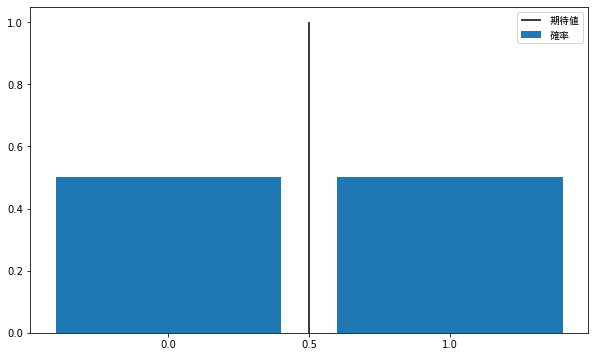

In [8]:
check_prob(X)
plot_prob(X)

<!--# グラフの線の種類
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率があります'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値は{E(X):.4}')
    print(f'分散は{(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f
p = 0.3
X = Bern(p)
check_prob(X)

plot_prob(X)
-->

***

### 二項分布

二項分布は1が出る確率がpのベルヌーイ試行をn回行った時の成功回数xが従う分布である. 成功する回数がとりうる値は{0, 1, …, n}である. ここではパラメタがn, p の二項分布をB(n, p)とする. n回の試行のうち成功する回数をxとするとその確率関数は
\begin{equation}
P(x)＝
\begin{cases}
  _n C_x p^{x}(1-p)^{n-x} & (x \in \{0,1,…,n\})\\\
  0 & (otherwise)
\end{cases}
\end{equation}
と表せる.

また二項分布の期待値と分散はE(x)=np、V(x)=np(1-p)と表せる.

2項分布の例として10回コインを投げて3回表が出る確率を考えると、その確率はP(x=2)= $_{10}C_3 (1/2)^{3}(1-{1/2})^{(10-3)}$= 15/128、これを視覚化すると

<!-- 
x in x_setはx_setにxが入っているかどうかを判断する、入っていればtrue

SciPyには順列の総数を返す関数scipy.special.comb()が用意されている。print(comb(4, 2))# 6.0　→4C2

numpy.arange()はPython組み込みのrange()のndarray版。range()、Pythonで連番を生成してfor文で使ったりそのリストを取得するにはrange()を使う。引数で範囲やステップを指定でき、0からではなく1からの連番や、飛ばし飛ばし、逆順（降順）の連番も生成可能。print(list(range(10)))# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]　→(n+1)は0~nまで
-->

In [9]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [10]:
n = 10
p = 0.3
X = Bin(n, p)

期待値:3.0
分散:2.1


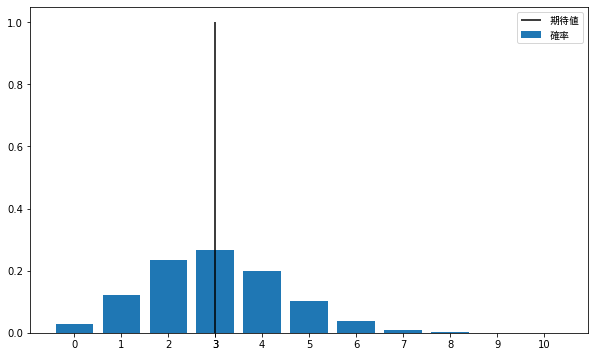

In [11]:
check_prob(X)
plot_prob(X)

***

### 幾何分布

幾何分布はベルヌーイ試行を繰り返して、初めて成功するまでの試行回数が従う確率分布である. 幾何分布のパラメタはベルヌーイ試行の成功確率pである. パラメタpの幾何分布をGe(p)とすると
\begin{equation}
f(x)＝
\begin{cases}
(1-p)^{(x-1)}p & (x \in \{1,2,…,n\})\\\
  0 & (otherwise)
\end{cases}
\end{equation}